In [0]:
import numpy as np
import cv2
import math

#Taking robot parameters from the user
print("Enter the desired robot parameteres:")
rad= float(input("Radius of the robot is: "))
clr= float(input("Clearance of the robot is: "))

print("Enter the start co-ordinates")
x_i= int(input("x_intial is: "))
y_i= int(input("y_intial is: "))
print("Enter the start co-ordinates")
x_f= int(input("x_final is: "))
y_f= int(input("y_final is: "))

#y_i= 200-y_i
#y_f= 200-y_f

if x_i>300 or x_f>300 or x_i<0 or x_f<0:
  print("The x co-ordinate should be within the limit (0-300)")
  exit(0)

if y_i>200 or y_f>200 or y_i<0 or y_f<0:
  print("The y co-ordinate should be within the limit (0-200)")
  exit(0)

start_pos= [x_i, y_i]
goal_pos= [x_f, y_f]
rc= rad+clr

#Check whether the point is in circular obstacle space using distance formula
def is_in_circle(point):
  center= [225, 50]
  pos_x= point[0] 
  pos_y= point[1]
  d_sq=(pos_x - center[0])**2 + (pos_y - center[1])**2
  if d_sq<= 625+rc:
    retun True 
  else:
    return False

#Check whether the point is in ellipsoidal obstacle space using disk bounded by ellipse formula
def is_in_ellipse(point):
  center= [150, 100]
  a= 40 +rc                                                                     #major axis
  b= 20 +rc                                                                     #minor axis
  pos_x= point[0]
  pos_y= point[1]
  d= (((pos_x- center[0])**2)/(a**2)) + (((pos_y-center[1])**2)/(b**2))
  if d<=1:
    return True
  else:
    return False

#Check whether the point is in square obstacle space
def is_in_diamond(point):
  p1= [200, 175]
  p2= [225, 160]
  p3= [250, 175]
  p4= [225, 190]
  pos_x= point[0]
  pos_y= point[1]

  slope1= (p2[1]-p1[1])/(p2[0]-p1[0])
  slope2= (p3[1]-p2[1])/(p3[0]-p2[0])
  slope3= (p4[1]-p3[1])/(p4[0]-p3[0])
  slope4= (p1[1]-p4[1])/(p1[0]-p4[0])


#Plotting Obstacle Space







#Defining Robot Movements
#Four Perpendicular Movements
def left(point):
  temp= [0,0]
  temp[0]=point[0]-1
  temp[1]=point[1]
  cost= 1
  return cost, temp

def right(point):
  temp= [0,0]
  temp[0]=point[0]+1
  temp[1]=point[1]
  cost= 1
  return cost, temp

def up(point):
  temp= [0,0]
  temp[0]=point[0]
  temp[1]=point[1]-1
  cost= 1
  return cost, temp

def down(point):
  temp= [0,0]
  temp[0]=point[0]
  temp[1]=point[1]+1
  cost= 1
  return cost, temp

#Four Diagonal Movements
def up_left(point):
  temp= [0,0]
  temp[0]=point[0]-1
  temp[1]=point[1]-1
  cost= 1.42
  return cost, temp

def down_left(point):
  temp= [0,0]
  temp[0]=point[0]-1
  temp[1]=point[1]+1
  cost= 1.42
  return cost, temp

def up_right(point):
  temp= [0,0]
  temp[0]=point[0]+1
  temp[1]=point[1]-1
  cost= 1.42
  return cost, temp

def down_right(point):
  temp= [0,0]
  temp[0]=point[0]+1
  temp[1]=point[1]+1
  cost= 1.42
  return cost, temp





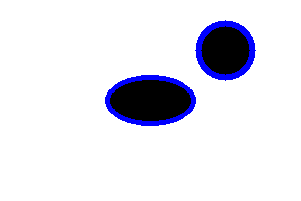

In [12]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
#Assuming the rad+clr= 5units
#Trying to set up the obstacle space
world= 255*np.ones((201, 301, 3), np.uint8)

cv2.circle(world, (225,50), 30, (255,0,0), -1)        #augmented obstacle space
cv2.circle(world, (225,50), 25-1, (0, 0, 0), -1)      #actual obstacle space 

cv2.ellipse(world, (150,100), (45,25), 0, 0, 360, 255, -1)
cv2.ellipse(world, (150,100), (40,20), 0, 0, 360, 0, -1)

cv2_imshow(world)
